In [1]:
curve_db = load('Curve Database (Conductor < 100 000)/curve_database_c1_to_100000.sobj')

In [2]:
def elliptic_curve_from_phi(phi):
    """
    Compute the Weierstrass coefficients (a, b) for the elliptic curve:
    y² = x³ + ax + b
    
    where the coefficients are given in terms of φ by equation (70):
    a = -(9φ⁴ - 12φ³ + 30φ² - 12φ + 1) / 3
    b = -2(27φ⁶ - 54φ⁵ - 135φ⁴ + 180φ³ - 99φ² + 18φ - 1) / 27
    
    Parameters:
    -----------
    phi : numeric (int, float, or symbolic)
        The parameter φ
    
    Returns:
    --------
    tuple : (a, b)
        The two Weierstrass coefficients
    """
    # Compute coefficient a
    a_numerator = 9*phi**4 - 12*phi**3 + 30*phi**2 - 12*phi + 1
    a = -a_numerator / 3
    
    # Compute coefficient b
    b_numerator = 27*phi**6 - 54*phi**5 - 135*phi**4 + 180*phi**3 - 99*phi**2 + 18*phi - 1
    b = -2 * b_numerator / 27
    
    return a, b

# SageMath version (if using Sage)
def elliptic_curve_from_phi_sage(phi):
    """
    SageMath version that returns an actual EllipticCurve object.
    
    Parameters:
    -----------
    phi : numeric or symbolic
        The parameter φ
    
    Returns:
    --------
    EllipticCurve : Sage EllipticCurve object
    """
    from sage.all import EllipticCurve, QQ
    
    a, b = elliptic_curve_from_phi(phi)
    
    # Create elliptic curve in Weierstrass form [0, 0, 0, a, b]
    return EllipticCurve([0, 0, 0, a, b])

In [3]:
phi = -1/7
elliptic_curve_from_phi_sage(phi).label()

'14a6'

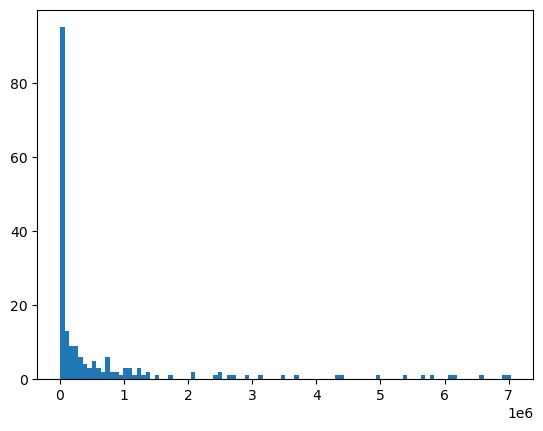

In [9]:
import matplotlib.pyplot as plt

phis = []
cs = []

for n in range(1,200):
    try:
        phi = 1/n
        cs.append(elliptic_curve_from_phi_sage(phi).conductor())
        phis.append(phi)
    except:
        continue

# phis = [1/n for n in range(1,200)]
# cs = [elliptic_curve_from_phi_sage(phi).conductor() for phi in phis]

plt.hist(cs, bins=100)
plt.show()

In [10]:
import numpy as np

#Let's generate a new set of rational elliptic curves associated to the HV manifold
Nphi = 40000

# phis = np.random.randint(1, 100, size = (Nphi))/np.random.randint(1, 100, size = (Nphi))
phis = np.random.randn(Nphi)
phis = [QQ(x) for x in phis]

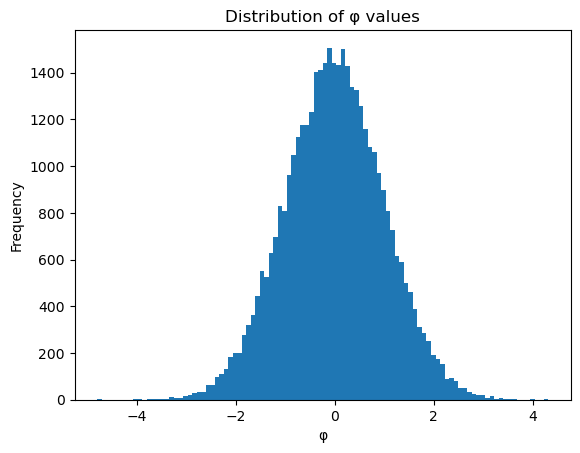

In [4]:
import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

Loading conductors: 100%|████████████████████████████████████████████████████████| 40000/40000 [01:36<00:00, 414.48it/s]


Total conductors: 40000
Min conductor: 2678471717726904330
Max conductor: 6007060793466863693043436026096063574794
Number of zeros: 0
Number of ones: 0
After filtering: 40000 conductors


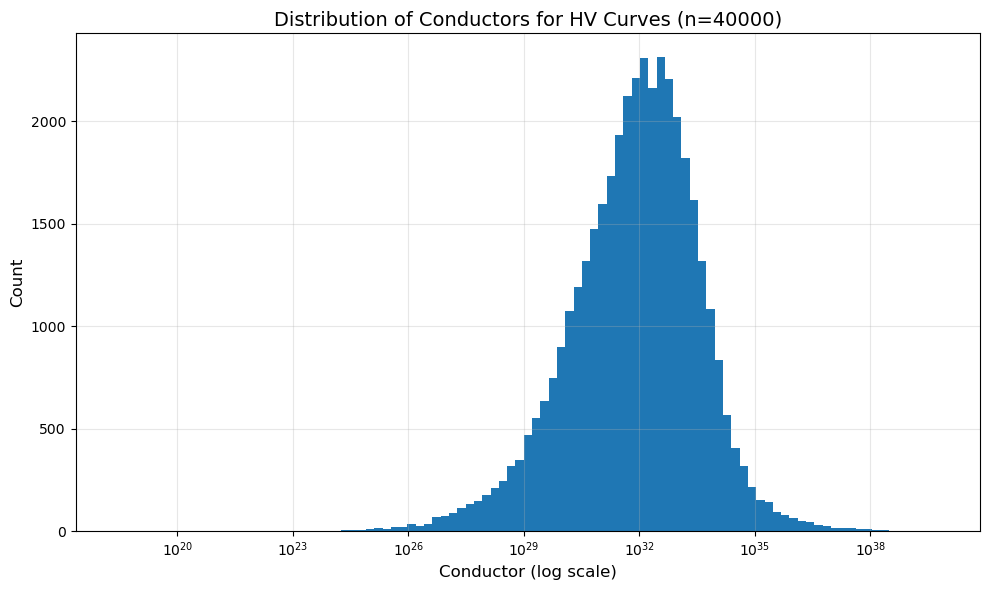

In [5]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

conductors = []
for phi in tqdm(phis, desc="Loading conductors: "):
    try:
        c = elliptic_curve_from_phi_sage(phi).conductor()
        conductors.append(c)
    except:
        continue

# Check for problematic values
print(f"Total conductors: {len(conductors)}")
print(f"Min conductor: {min(conductors)}")
print(f"Max conductor: {max(conductors)}")
print(f"Number of zeros: {conductors.count(0)}")
print(f"Number of ones: {conductors.count(1)}")

# Filter out zeros and ones (if any)
conductors_filtered = [c for c in conductors if c > 1]
print(f"After filtering: {len(conductors_filtered)} conductors")

if len(conductors_filtered) > 0:
    min_c = float(min(conductors_filtered))
    max_c = float(max(conductors_filtered))
    logbins = np.logspace(np.log10(min_c), np.log10(max_c), 100)
    
    plt.figure(figsize=(10, 6))
    plt.hist(conductors_filtered, bins=logbins)
    plt.xscale('log')
    plt.xlabel('Conductor (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of Conductors for HV Curves (n={len(conductors_filtered)})', fontsize=14)
    plt.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    plt.savefig('HV_curves/conductor_distribution_phi=normal(0,1).png', dpi=150)
    plt.show()
else:
    print("No valid conductors to plot!")

In [31]:
import numpy as np

#Let's generate a new set of rational elliptic curves associated to the HV manifold
Nphi = 20000
mean = 0.
sigma = 1.

# phis = np.random.randint(1, 100, size = (Nphi))/np.random.randint(1, 100, size = (Nphi))
phis = np.random.normal(loc=mean, scale=sigma, size=Nphi)
phis = [QQ(round(x, 4)) for x in phis]

# Remove duplicates (order not preserved)
phis = list(set(phis))
print(f"Original: {Nphi}, Unique: {len(phis)}")

Original: 20000, Unique: 15428


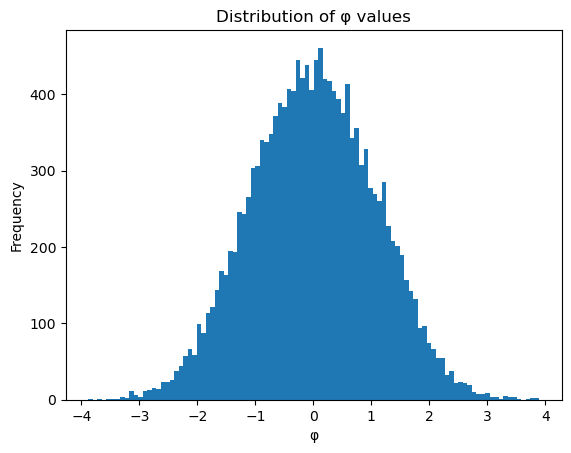

In [32]:
import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

Loading conductors: 100%|█████████████████████████████████████████████████████████| 4430/4430 [00:02<00:00, 2017.68it/s]


Total conductors: 4428
Min conductor: 14
Max conductor: 6893814452910
Number of zeros: 0
Number of ones: 0
After filtering: 4428 conductors


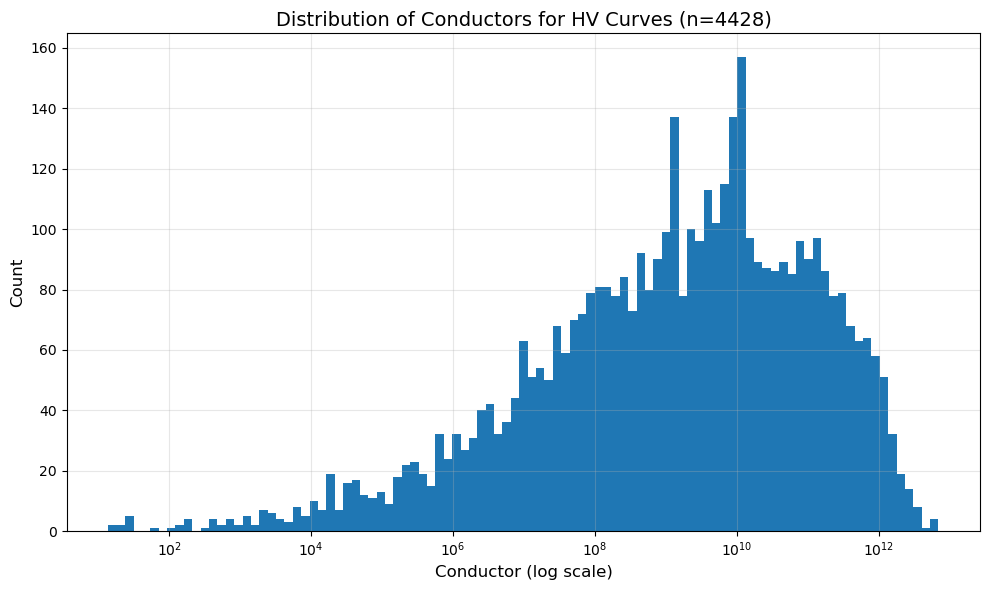

In [30]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

conductors = []
for phi in tqdm(phis, desc="Loading conductors: "):
    try:
        c = elliptic_curve_from_phi_sage(phi).conductor()
        conductors.append(c)
    except:
        continue

# Check for problematic values
print(f"Total conductors: {len(conductors)}")
print(f"Min conductor: {min(conductors)}")
print(f"Max conductor: {max(conductors)}")
print(f"Number of zeros: {conductors.count(0)}")
print(f"Number of ones: {conductors.count(1)}")

# Filter out zeros and ones (if any)
conductors_filtered = [c for c in conductors if c > 1]
print(f"After filtering: {len(conductors_filtered)} conductors")

if len(conductors_filtered) > 0:
    min_c = float(min(conductors_filtered))
    max_c = float(max(conductors_filtered))
    logbins = np.logspace(np.log10(min_c), np.log10(max_c), 100)
    
    plt.figure(figsize=(10, 6))
    plt.hist(conductors_filtered, bins=logbins)
    plt.xscale('log')
    plt.xlabel('Conductor (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of Conductors for HV Curves (n={len(conductors_filtered)})', fontsize=14)
    plt.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    plt.savefig(f'HV_curves/conductor_distribution_phi=normal({mean},{sigma}).png', dpi=150)
    plt.show()
else:
    print("No valid conductors to plot!")

Original: 20000, Unique: 199


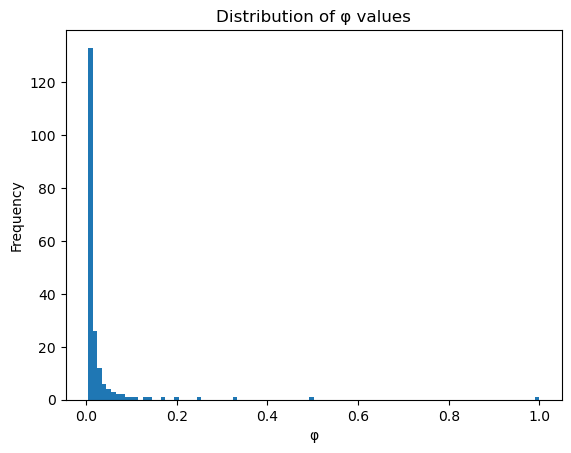

Loading conductors: 100%|███████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 1938.22it/s]


Total conductors: 197
Min conductor: 14
Max conductor: 7036380
Number of zeros: 0
Number of ones: 0
After filtering: 197 conductors


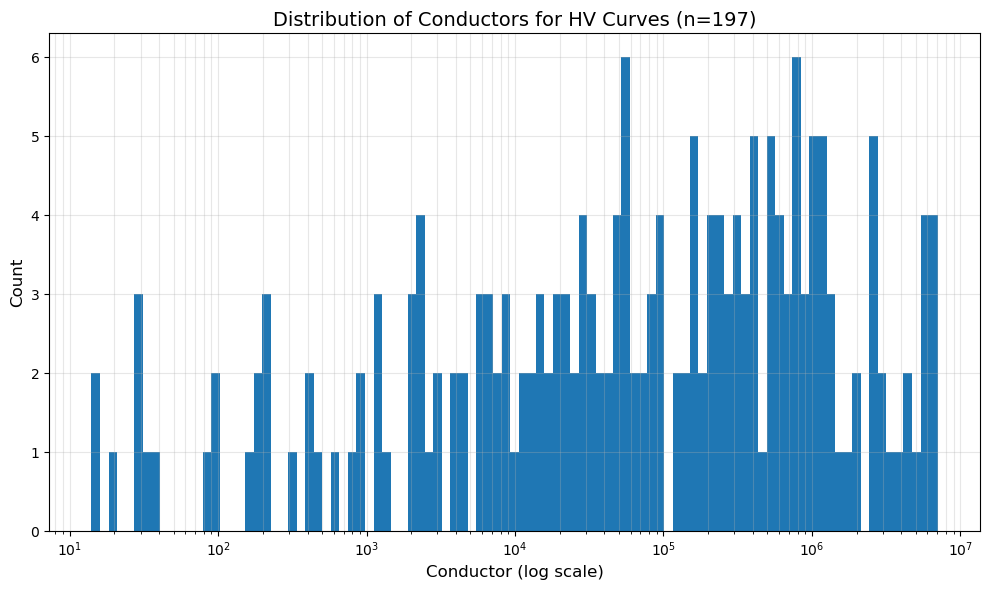

In [13]:
import numpy as np

#Let's generate a new set of rational elliptic curves associated to the HV manifold
Nphi = 20000

# phis = np.random.randint(1, 100, size = (Nphi))/np.random.randint(1, 100, size = (Nphi))
nmax = 200
nmin = 1
phis = [1/n for n in range(nmin,nmax)]

# Remove duplicates (order not preserved)
phis = list(set(phis))
print(f"Original: {Nphi}, Unique: {len(phis)}")

import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

conductors = []
for phi in tqdm(phis, desc="Loading conductors: "):
    try:
        c = elliptic_curve_from_phi_sage(phi).conductor()
        conductors.append(c)
    except:
        continue

# Check for problematic values
print(f"Total conductors: {len(conductors)}")
print(f"Min conductor: {min(conductors)}")
print(f"Max conductor: {max(conductors)}")
print(f"Number of zeros: {conductors.count(0)}")
print(f"Number of ones: {conductors.count(1)}")

# Filter out zeros and ones (if any)
conductors_filtered = [c for c in conductors if c > 1]
print(f"After filtering: {len(conductors_filtered)} conductors")

if len(conductors_filtered) > 0:
    min_c = float(min(conductors_filtered))
    max_c = float(max(conductors_filtered))
    logbins = np.logspace(np.log10(min_c), np.log10(max_c), 100)
    
    plt.figure(figsize=(10, 6))
    plt.hist(conductors_filtered, bins=logbins)
    plt.xscale('log')
    plt.xlabel('Conductor (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of Conductors for HV Curves (n={len(conductors_filtered)})', fontsize=14)
    plt.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    plt.savefig(f'HV_curves/conductor_distribution_phi=1 over n,n in ({nmin},{nmax}).png', dpi=150)
    plt.show()
else:
    print("No valid conductors to plot!")

✓ curve_db is already loaded with 437226 isogeny classes

Generating phis using fraction sampling (phi = m/n)...
Using 28 CPU cores


Phi generation: 100%|████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 402.34it/s]


Initial phi set: 159600 (redundant) rational values
After removing duplicates: 48927 unique rational values

Processing phis...


Loading conductors: 100%|████████████████████████████████████████████████████████| 48927/48927 [05:33<00:00, 146.58it/s]



Analyzing isogeny class multiplicities and phi families...
Phis with no match (multiplicity 0): 46647
Phis with matches (multiplicity > 0): 2280
Maximum multiplicity: 6
Number of distinct isogeny classes: 1212

Multiplicity distribution:
  Multiplicity 0: 46647 phis
  Multiplicity 1: 262 phis
  Multiplicity 2: 1802 phis
  Multiplicity 3: 45 phis
  Multiplicity 4: 44 phis
  Multiplicity 5: 55 phis
  Multiplicity 6: 72 phis

Example phi families (first 5 isogeny classes with multiplicity > 1):
  10010f: 2 phis
    [7/128, 121/65]
  10010s: 2 phis
    [-8/5, 13/77]
  10010z: 2 phis
    [11/91, -10]
  10218k: 2 phis
    [3/131, 16/13]
  10230bb: 2 phis
    [-16/11, 27/155]

Found 1212 phis in database below 100,000 conductors, associated to distinct isogeny classes

Saving results...
Saved scan data to phi_scan_results/(-200,200)_phi_scan_data.sobj
Saved individual lists:
  - phi_scan_results/(-200,200)_phi_reps.sobj
  - phi_scan_results/(-200,200)_conductors.sobj
  - phi_scan_results/(-2

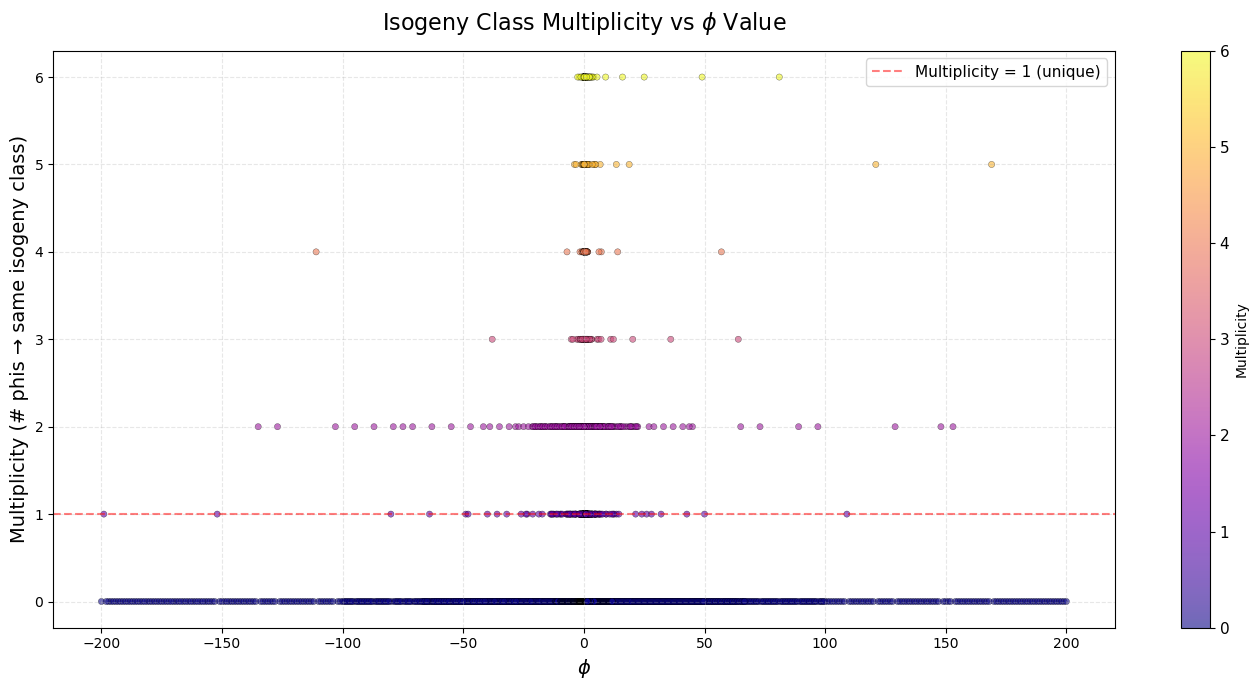

Student-t normalized fit: x0=0.636, sigma=1.011, nu=1.677
Saved phi fit parameters to HV_curves/(-200,200)_phi_dist_tfit_params.sobj
Saved plot: HV_curves/(-200,200)_phi_dist_tfit.png


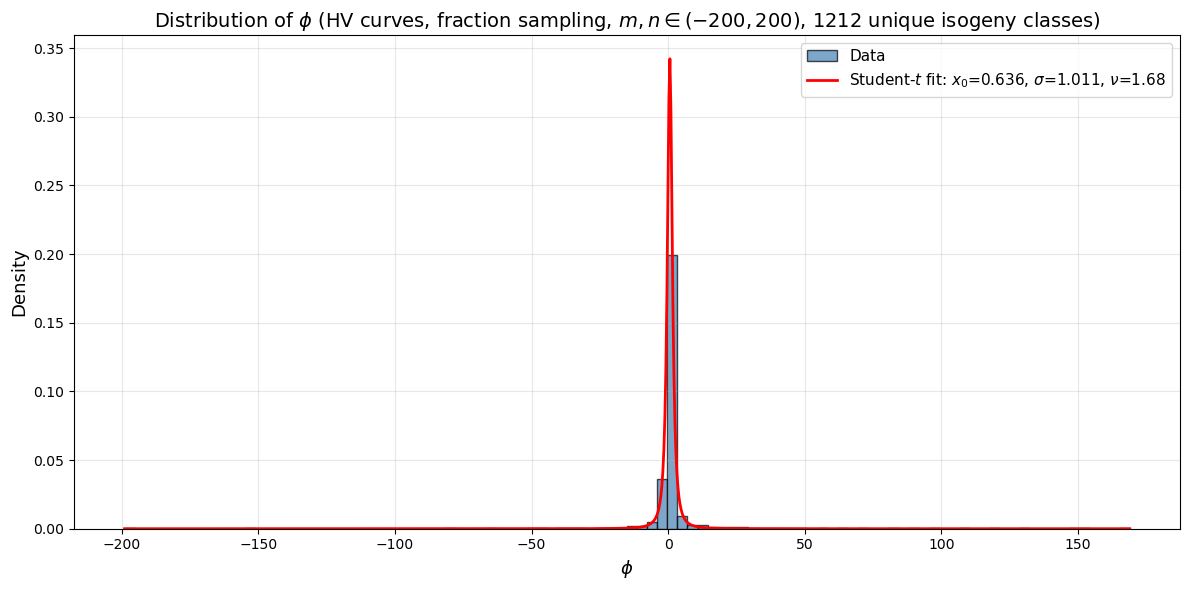

Saved plot: HV_curves/(-200,200)_conductor_vs_phi.png


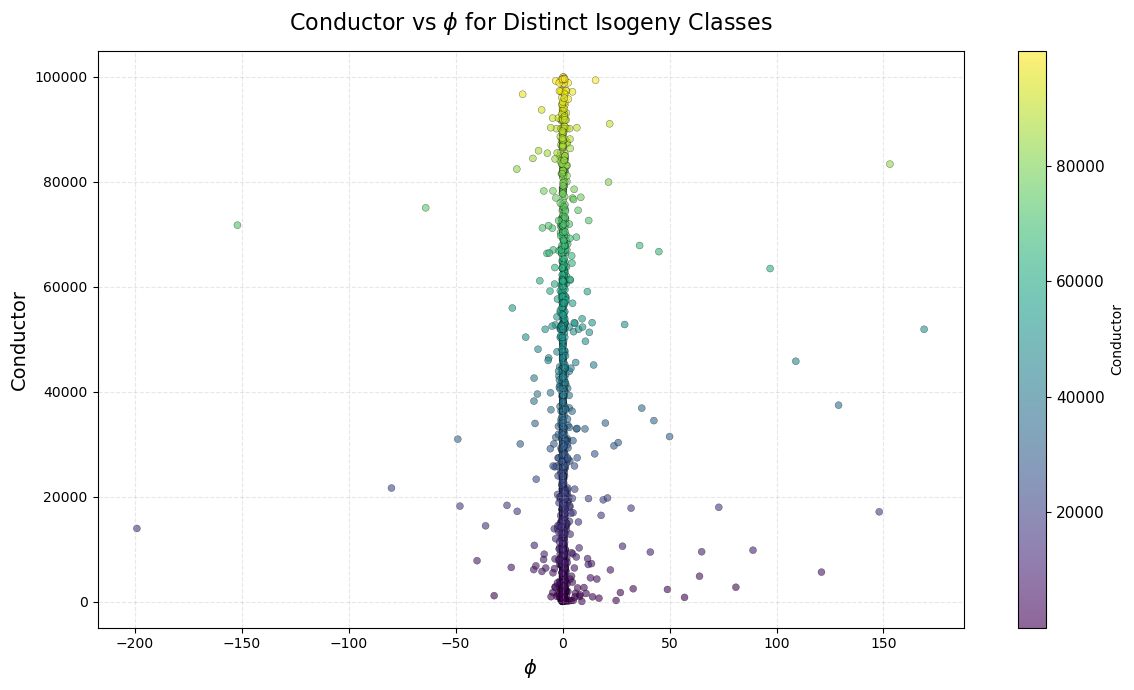

Power law fit: A=7.40e-04, α=0.419
Saved fit parameters to HV_curves/(-200,200)_powerlaw_fit_params.sobj
Saved plot: HV_curves/(-200,200)_conductor_distribution_fit.png


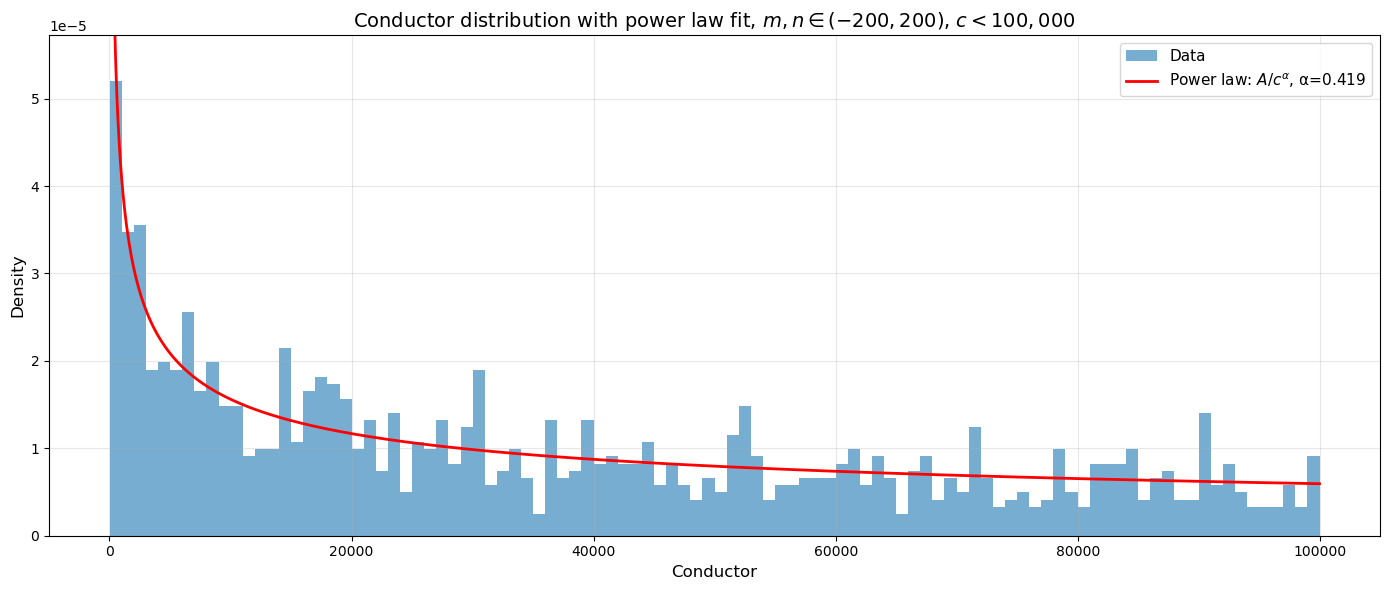

Saved plot: HV_curves/(-200,200)_conductor_distribution_loglog.png


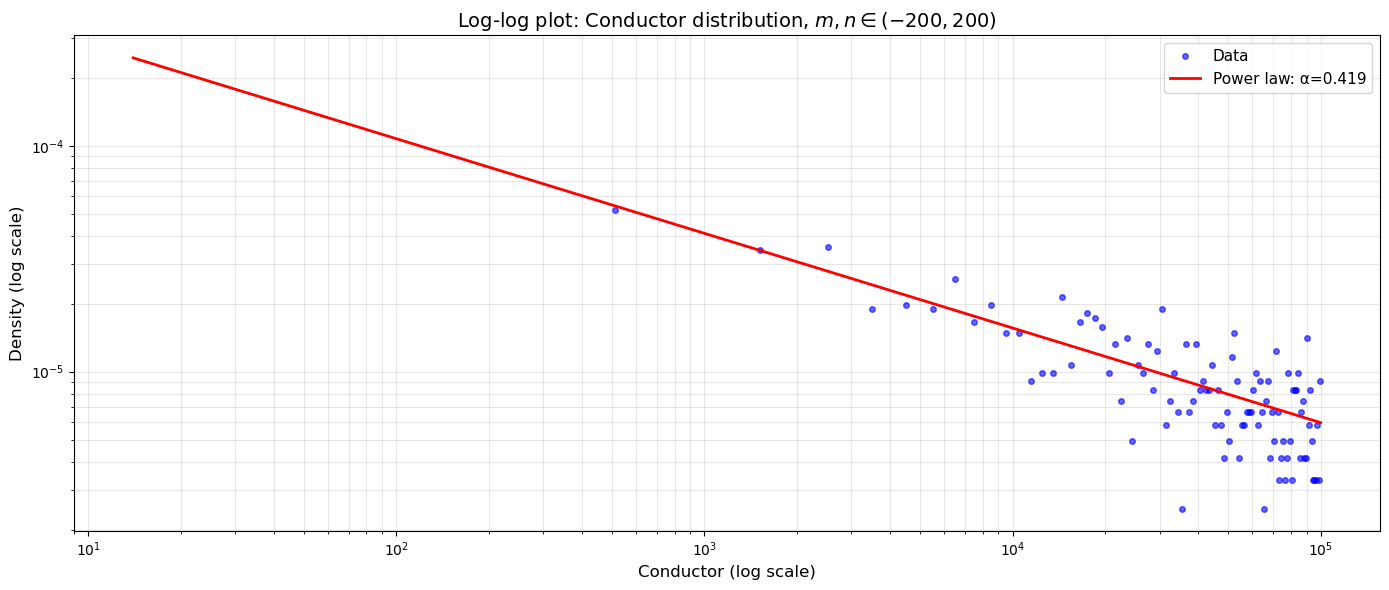

Saved plot: phi_scan_results/(-200,200)_multiplicity_histogram.png


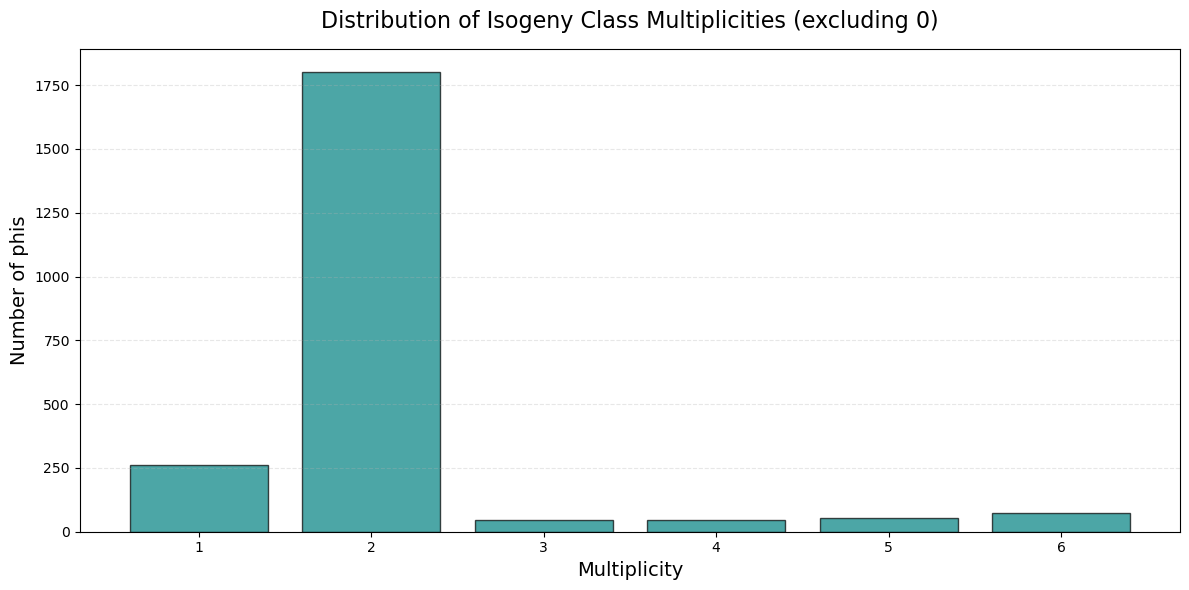


Extracting ap coefficients by rank...


Loading aps: 100%|██████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 574406.38it/s]

Averaging the aps...
Done.

Rank 0: 604 isogeny classes
Rank 1: 579 isogeny classes
Rank 2: 29 isogeny classes
Rank 3: 0 isogeny classes

Saved average aps to HV_curves/(-200,200)_average_aps.sobj

Creating ap coefficient plots...


Saved plot: HV_curves/(-200,200)_ap_averages_rank0_vs_rank1.png


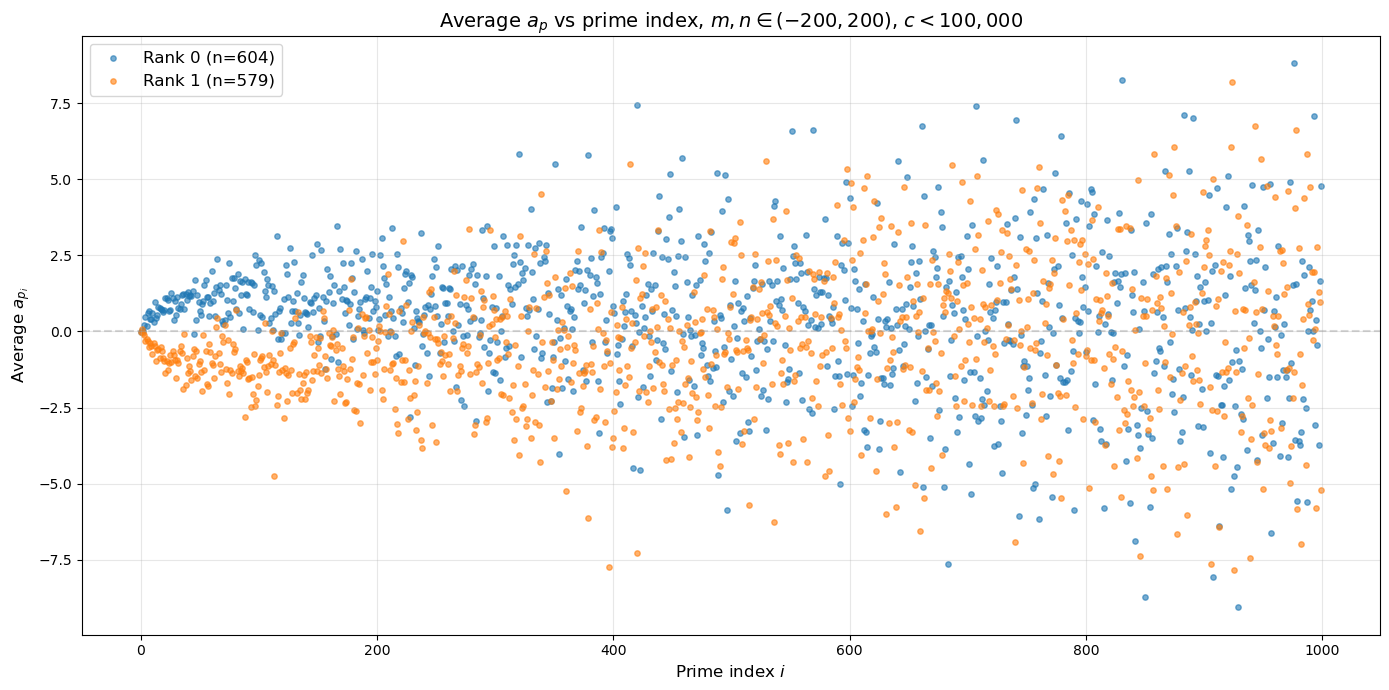

Skipped all ranks plot: would be identical to rank 0 vs rank 1 plot

Done!


In [23]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool, cpu_count
import os
from scipy.optimize import curve_fit
from scipy.special import gamma

# Check if curve_db is loaded, if not load it
try:
    curve_db
    print(f"✓ curve_db is already loaded with {len(curve_db)} isogeny classes")
except NameError:
    print("Loading curve database...")
    curve_db = load('Curve Database (Conductor < 100 000)/curve_database_c1_to_100000.sobj')
    print(f"✓ Loaded curve_db with {len(curve_db)} isogeny classes")
print()

def elliptic_curve_from_phi(phi):
    """
    Compute the Weierstrass coefficients (a, b) for the elliptic curve:
    y² = x³ + ax + b
    
    where the coefficients are given in terms of φ by equation (70):
    a = -(9φ⁴ - 12φ³ + 30φ² - 12φ + 1) / 3
    b = -2(27φ⁶ - 54φ⁵ - 135φ⁴ + 180φ³ - 99φ² + 18φ - 1) / 27
    
    Parameters:
    -----------
    phi : numeric (int, float, or symbolic)
        The parameter φ
    
    Returns:
    --------
    tuple : (a, b)
        The two Weierstrass coefficients
    """
    # Compute coefficient a
    a_numerator = 9*phi**4 - 12*phi**3 + 30*phi**2 - 12*phi + 1
    a = -a_numerator / 3
    
    # Compute coefficient b
    b_numerator = 27*phi**6 - 54*phi**5 - 135*phi**4 + 180*phi**3 - 99*phi**2 + 18*phi - 1
    b = -2 * b_numerator / 27
    
    return a, b

def elliptic_curve_from_phi_sage(phi):
    """
    SageMath version that returns an actual EllipticCurve object.
    
    Parameters:
    -----------
    phi : numeric or symbolic
        The parameter φ
    
    Returns:
    --------
    EllipticCurve : Sage EllipticCurve object
    """
    from sage.all import EllipticCurve, QQ
    
    a, b = elliptic_curve_from_phi(phi)
    
    # Create elliptic curve in Weierstrass form [0, 0, 0, a, b]
    return EllipticCurve([0, 0, 0, a, b])

def generate_phis_for_m(args):
    """
    Generate all phi values for a given m value using fraction sampling.
    
    Fraction sampling: phi = m/n where m, n are integers in specified range
    """
    m, nmin, nmax = args
    local_phis = []
    for n in range(nmin, nmax):
        if n != 0:
            local_phis.append(QQ(m/n))
    return local_phis

def get_isogeny_class(label):
    """Extract isogeny class from label (e.g., '37a2' -> '37a')"""
    i = len(label) - 1
    while i >= 0 and label[i].isdigit():
        i -= 1
    return label[:i+1]

def process_phi(phi):
    """Worker function to process a single phi value"""
    try:
        # Get the elliptic curve and its Cremona label
        E = elliptic_curve_from_phi_sage(phi)
        label = E.label()
        
        # Extract isogeny class from label (string manipulation)
        iso = get_isogeny_class(label)
        
        # Look up in database by isogeny class
        curve = curve_db[iso]
        c = curve['conductor']
        
        return (phi, c, iso)
    except:
        return None

def power_law(x, A, alpha):
    """Power law: A / x^alpha"""
    return A / (x**alpha)

def student_t_norm(x, x0, sigma, nu):
    """Normalized symmetric Student-t PDF."""
    norm = gamma((nu + 1) / 2) / (np.sqrt(nu * np.pi) * sigma * gamma(nu / 2))
    return norm * (1 + ((x - x0)**2) / (nu * sigma**2)) ** (-(nu + 1) / 2)

# ============================================================================
# FRACTION SAMPLING: Generate phi = m/n for m, n in range [nmin, nmax]
# ============================================================================

nmax = 200
nmin = -200

# Parallelize phi generation using fraction sampling
print("Generating phis using fraction sampling (phi = m/n)...")
print(f"Using {cpu_count()} CPU cores")
m_values = [(m, nmin, nmax) for m in range(nmin, nmax)]

with Pool(processes=cpu_count()) as pool:
    phi_lists = list(tqdm(
        pool.imap(generate_phis_for_m, m_values),
        total=len(m_values),
        desc="Phi generation"
    ))

# Flatten the list of lists
phis = [phi for sublist in phi_lists for phi in sublist]

print(f"Initial phi set: {len(phis)} (redundant) rational values")

# Remove duplicates
phis = list(set(phis))
print(f"After removing duplicates: {len(phis)} unique rational values")

# ============================================================================
# PROCESS PHIS: Match to elliptic curves in database
# ============================================================================

print(f"\nProcessing phis...")
with Pool(processes=cpu_count()) as pool:
    results = list(tqdm(
        pool.imap(process_phi, phis),
        total=len(phis),
        desc="Loading conductors"
    ))

# ============================================================================
# TRACK MULTIPLICITIES AND PHI FAMILIES: How many phis map to each isogeny class
# ============================================================================

print("\nAnalyzing isogeny class multiplicities and phi families...")

# Build mappings
phi_to_iso = {}  # phi -> isogeny class (or None)
iso_to_count = {}  # isogeny class -> count of phis mapping to it
iso_to_phis = {}  # isogeny class -> list of phis mapping to it

for phi, result in zip(phis, results):
    if result is not None:
        _, _, iso = result
        phi_to_iso[phi] = iso
        iso_to_count[iso] = iso_to_count.get(iso, 0) + 1
        
        # Track the actual phi values for this isogeny class
        if iso not in iso_to_phis:
            iso_to_phis[iso] = []
        iso_to_phis[iso].append(phi)
    else:
        phi_to_iso[phi] = None

# Create multiplicity list for each phi
multiplicities = []
for phi in phis:
    iso = phi_to_iso.get(phi)
    if iso is None:
        multiplicities.append(0)
    else:
        multiplicities.append(iso_to_count[iso])

# Print statistics
num_zero_mult = sum(1 for m in multiplicities if m == 0)
num_nonzero_mult = len(multiplicities) - num_zero_mult
max_mult = max(multiplicities) if multiplicities else 0

print(f"Phis with no match (multiplicity 0): {num_zero_mult}")
print(f"Phis with matches (multiplicity > 0): {num_nonzero_mult}")
print(f"Maximum multiplicity: {max_mult}")
print(f"Number of distinct isogeny classes: {len(iso_to_count)}")

# Distribution of multiplicities
mult_counts = {}
for m in multiplicities:
    mult_counts[m] = mult_counts.get(m, 0) + 1

print("\nMultiplicity distribution:")
for mult in sorted(mult_counts.keys()):
    print(f"  Multiplicity {mult}: {mult_counts[mult]} phis")

# Print some examples of phi families
print("\nExample phi families (first 5 isogeny classes with multiplicity > 1):")
examples_shown = 0
for iso in sorted(iso_to_phis.keys()):
    if len(iso_to_phis[iso]) > 1 and examples_shown < 5:
        print(f"  {iso}: {len(iso_to_phis[iso])} phis")
        # Show first few phis if there are many
        phi_list = iso_to_phis[iso]
        if len(phi_list) <= 5:
            print(f"    {phi_list}")
        else:
            print(f"    {phi_list[:5]} ... (and {len(phi_list)-5} more)")
        examples_shown += 1

# ============================================================================
# FILTER TO UNIQUE ISOGENY CLASSES
# ============================================================================

# Filter out None results and keep only unique isogeny classes
cs = []
seen_iso_classes = []
phi_reps = []
for result in results:
    if result is not None:
        phi, c, iso = result
        if iso not in seen_iso_classes:
            cs.append(c)
            seen_iso_classes.append(iso)
            phi_reps.append(phi)

print(f"\nFound {len(phi_reps)} phis in database below 100,000 conductors, associated to distinct isogeny classes")

# ============================================================================
# SAVE RESULTS
# ============================================================================

# Create output directory
os.makedirs('phi_scan_results/', exist_ok=True)

print("\nSaving results...")
scan_data = {
    'phi_reps': phi_reps,
    'conductors': cs,
    'isogeny_classes': seen_iso_classes,
    'all_phis': phis,
    'multiplicities': multiplicities,
    'phi_to_iso': phi_to_iso,
    'iso_to_count': iso_to_count,
    'iso_to_phis': iso_to_phis,  # NEW: family of phis for each isogeny class
    'total_phis_generated': len(phis),
    'total_found': len(phi_reps),
    'nmin': nmin,
    'nmax': nmax
}

save(scan_data, f'phi_scan_results/({nmin},{nmax})_phi_scan_data.sobj')
print(f"Saved scan data to phi_scan_results/({nmin},{nmax})_phi_scan_data.sobj")

# Save individual lists
save(phi_reps, f'phi_scan_results/({nmin},{nmax})_phi_reps.sobj')
save(cs, f'phi_scan_results/({nmin},{nmax})_conductors.sobj')
save(seen_iso_classes, f'phi_scan_results/({nmin},{nmax})_isogeny_classes.sobj')
save(multiplicities, f'phi_scan_results/({nmin},{nmax})_multiplicities.sobj')
save(phis, f'phi_scan_results/({nmin},{nmax})_all_phis.sobj')
save(iso_to_phis, f'phi_scan_results/({nmin},{nmax})_iso_to_phis.sobj')  # NEW

print("Saved individual lists:")
print(f"  - phi_scan_results/({nmin},{nmax})_phi_reps.sobj")
print(f"  - phi_scan_results/({nmin},{nmax})_conductors.sobj")
print(f"  - phi_scan_results/({nmin},{nmax})_isogeny_classes.sobj")
print(f"  - phi_scan_results/({nmin},{nmax})_multiplicities.sobj")
print(f"  - phi_scan_results/({nmin},{nmax})_all_phis.sobj")
print(f"  - phi_scan_results/({nmin},{nmax})_iso_to_phis.sobj")  # NEW

# ============================================================================
# ENHANCED PLOTTING SECTION
# ============================================================================

print("\nCreating enhanced visualizations...")

# Plot 1: Multiplicity vs phi
phis_float = [float(phi) for phi in phis]

plt.figure(figsize=(14, 7))
scatter = plt.scatter(phis_float, multiplicities, c=multiplicities, cmap='plasma',
                     alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
cbar = plt.colorbar(scatter, label='Multiplicity')
cbar.ax.tick_params(labelsize=11)
plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel('Multiplicity (# phis → same isogeny class)', fontsize=14)
plt.title(r'Isogeny Class Multiplicity vs $\phi$ Value', fontsize=16, pad=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, alpha=0.5, 
           label='Multiplicity = 1 (unique)')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig(f'phi_scan_results/({nmin},{nmax})_multiplicity_vs_phi.png', dpi=150, bbox_inches='tight')
print(f"Saved plot: phi_scan_results/({nmin},{nmax})_multiplicity_vs_phi.png")
plt.show()
plt.close()

# Plot 2: Phi distribution with Student's t fit
phi_reps_float = [float(phi) for phi in phi_reps]

plt.figure(figsize=(12, 6))
# Create normalized histogram
counts_phi, bins_phi, _ = plt.hist(
    phi_reps_float, bins=100, density=True,
    edgecolor='black', alpha=0.7, color='steelblue',
    label='Data'
)

# Compute bin centers for fitting
bin_centers_phi = 0.5 * (bins_phi[:-1] + bins_phi[1:])
mask_phi = counts_phi > 0

# Initial guesses
x0_guess = np.mean(phi_reps_float)
sigma_guess = np.std(phi_reps_float)
nu_guess = 2.0

try:
    popt_phi, pcov_phi = curve_fit(
        student_t_norm,
        bin_centers_phi[mask_phi],
        counts_phi[mask_phi],
        p0=[x0_guess, sigma_guess, nu_guess],
        bounds=([-np.inf, 1e-6, 0.1], [np.inf, np.inf, 100]),
        maxfev=20000
    )
    x0_fit, sigma_fit, nu_fit = popt_phi
    
    # Generate fitted curve
    x_fit_phi = np.linspace(min(phi_reps_float), max(phi_reps_float), 1000)
    y_fit_phi = student_t_norm(x_fit_phi, x0_fit, sigma_fit, nu_fit)
    
    # Plot fit
    plt.plot(
        x_fit_phi, y_fit_phi, 'r-', linewidth=2,
        label=(
            r"Student-$t$ fit: "
            fr"$x_0$={x0_fit:.3f}, $\sigma$={sigma_fit:.3f}, $\nu$={nu_fit:.2f}"
        )
    )
    
    print(f"Student-t normalized fit: x0={x0_fit:.3f}, sigma={sigma_fit:.3f}, nu={nu_fit:.3f}")
    
    # Save fit parameters
    phi_fit_params = {
        'x0': x0_fit,
        'sigma': sigma_fit,
        'nu': nu_fit
    }
    save(phi_fit_params, f'HV_curves/({nmin},{nmax})_phi_dist_tfit_params.sobj')
    print(f"Saved phi fit parameters to HV_curves/({nmin},{nmax})_phi_dist_tfit_params.sobj")
    
except Exception as e:
    print(f"Student-t fit failed: {e}")

plt.xlabel(r'$\phi$', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title(
    fr'Distribution of $\phi$ (HV curves, fraction sampling, '
    fr'$m, n \in ({nmin}, {nmax})$, {len(phi_reps)} unique isogeny classes)',
    fontsize=14
)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_phi_dist_tfit.png', dpi=150, bbox_inches='tight')
print(f"Saved plot: HV_curves/({nmin},{nmax})_phi_dist_tfit.png")
plt.show()
plt.close()

# Plot 3: Conductor vs phi (enhanced with colormap)
plt.figure(figsize=(12, 7))
scatter = plt.scatter(phi_reps, cs, c=cs, cmap='viridis', 
                     alpha=0.6, s=25, edgecolors='black', linewidth=0.3)
cbar = plt.colorbar(scatter, label='Conductor')
cbar.ax.tick_params(labelsize=11)
plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel('Conductor', fontsize=14)
plt.title(r'Conductor vs $\phi$ for Distinct Isogeny Classes', fontsize=16, pad=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_conductor_vs_phi.png', dpi=150, bbox_inches='tight')
print(f"Saved plot: HV_curves/({nmin},{nmax})_conductor_vs_phi.png")
plt.show()
plt.close()

# Plot 4: Conductor distribution with power law fit
plt.figure(figsize=(14, 6))
# Create histogram
counts_c, bins_c, patches = plt.hist(cs, bins=100, density=True, alpha=0.6, label='Data')

# Use bin centers for fitting
bin_centers_c = (bins_c[:-1] + bins_c[1:]) / 2
# Filter out zero counts for better fitting
mask_c = counts_c > 0

try:
    popt_c, pcov_c = curve_fit(power_law, bin_centers_c[mask_c], counts_c[mask_c], 
                               p0=[1e6, 1.5], maxfev=10000)
    A_fit, alpha_fit = popt_c
    
    x_fit_c = np.linspace(min(cs), max(cs), 1000)
    y_power = power_law(x_fit_c, A_fit, alpha_fit)
    
    plt.plot(x_fit_c, y_power, 'r-', linewidth=2, 
            label=f'Power law: $A/c^{{\\alpha}}$, α={alpha_fit:.3f}')
    print(f"Power law fit: A={A_fit:.2e}, α={alpha_fit:.3f}")
    
    # Save fit parameters
    fit_params = {
        'A': A_fit,
        'alpha': alpha_fit,
        'c_min': min(cs),
        'c_max': max(cs)
    }
    save(fit_params, f'HV_curves/({nmin},{nmax})_powerlaw_fit_params.sobj')
    print(f"Saved fit parameters to HV_curves/({nmin},{nmax})_powerlaw_fit_params.sobj")
    
except Exception as e:
    print(f"Power law fit failed: {e}")

# Set y-axis limits based on histogram data
plt.ylim(0, np.max(counts_c) * 1.1)
plt.xlabel("Conductor", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title(fr"Conductor distribution with power law fit, $m,n\in({nmin},{nmax})$, $c<100,000$", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_conductor_distribution_fit.png', dpi=150)
print(f"Saved plot: HV_curves/({nmin},{nmax})_conductor_distribution_fit.png")
plt.show()
plt.close()

# Plot 5: Log-log plot of conductor distribution
plt.figure(figsize=(14, 6))
counts_c_nonzero = counts_c[counts_c > 0]
bin_centers_c_nonzero = bin_centers_c[counts_c > 0]
plt.loglog(bin_centers_c_nonzero, counts_c_nonzero, 'bo', alpha=0.6, label='Data', markersize=4)

# Plot fitted power law on log-log scale
try:
    x_fit_c_positive = x_fit_c[x_fit_c > 0]
    y_power_fit = power_law(x_fit_c_positive, A_fit, alpha_fit)
    plt.loglog(x_fit_c_positive, y_power_fit, 'r-', linewidth=2, 
               label=f'Power law: α={alpha_fit:.3f}')
except:
    pass

plt.xlabel("Conductor (log scale)", fontsize=12)
plt.ylabel("Density (log scale)", fontsize=12)
plt.title(fr"Log-log plot: Conductor distribution, $m,n\in({nmin},{nmax})$", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_conductor_distribution_loglog.png', dpi=150)
print(f"Saved plot: HV_curves/({nmin},{nmax})_conductor_distribution_loglog.png")
plt.show()
plt.close()

# Plot 6: Multiplicity histogram (excluding multiplicity 0)
plt.figure(figsize=(12, 6))
mult_values = sorted([m for m in mult_counts.keys() if m > 0])
mult_freqs = [mult_counts[m] for m in mult_values]
plt.bar(mult_values, mult_freqs, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Multiplicity', fontsize=14)
plt.ylabel('Number of phis', fontsize=14)
plt.title('Distribution of Isogeny Class Multiplicities (excluding 0)', fontsize=16, pad=15)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.savefig(f'phi_scan_results/({nmin},{nmax})_multiplicity_histogram.png', dpi=150, bbox_inches='tight')
print(f"Saved plot: phi_scan_results/({nmin},{nmax})_multiplicity_histogram.png")
plt.show()
plt.close()

# ============================================================================
# EXTRACT AND ANALYZE AP COEFFICIENTS BY RANK
# ============================================================================

print("\nExtracting ap coefficients by rank...")

# Extract average aps sorted by rank
rk0_aps = []
rk1_aps = []
rk2_aps = []
rk3_aps = []
for iso in tqdm(seen_iso_classes, desc="Loading aps"):
    curve = curve_db[iso]
    rk = curve['rank']
    aps = curve['ap_list']
    if rk == 0:
        rk0_aps.append(aps)
    elif rk == 1:
        rk1_aps.append(aps)
    elif rk == 2:
        rk2_aps.append(aps)
    elif rk == 3:
        rk3_aps.append(aps)

# Convert to numpy arrays
rk0_aps = np.array(rk0_aps) if len(rk0_aps) > 0 else None
rk1_aps = np.array(rk1_aps) if len(rk1_aps) > 0 else None
rk2_aps = np.array(rk2_aps) if len(rk2_aps) > 0 else None
rk3_aps = np.array(rk3_aps) if len(rk3_aps) > 0 else None

print("Averaging the aps...")
rk0_average_aps = np.mean(rk0_aps, axis=0) if rk0_aps is not None else None
rk1_average_aps = np.mean(rk1_aps, axis=0) if rk1_aps is not None else None
rk2_average_aps = np.mean(rk2_aps, axis=0) if rk2_aps is not None else None
rk3_average_aps = np.mean(rk3_aps, axis=0) if rk3_aps is not None else None
print("Done.")

# Print statistics
print(f"\nRank 0: {len(rk0_aps) if rk0_aps is not None else 0} isogeny classes")
print(f"Rank 1: {len(rk1_aps) if rk1_aps is not None else 0} isogeny classes")
print(f"Rank 2: {len(rk2_aps) if rk2_aps is not None else 0} isogeny classes")
print(f"Rank 3: {len(rk3_aps) if rk3_aps is not None else 0} isogeny classes")

# ============================================================================
# SAVE AP COEFFICIENT DATA
# ============================================================================

# Save the data
averages_data = {
    'rank_0_average': rk0_average_aps.tolist() if rk0_average_aps is not None else None,
    'rank_1_average': rk1_average_aps.tolist() if rk1_average_aps is not None else None,
    'rank_2_average': rk2_average_aps.tolist() if rk2_average_aps is not None else None,
    'rank_3_average': rk3_average_aps.tolist() if rk3_average_aps is not None else None,
    'rank_0_count': len(rk0_aps) if rk0_aps is not None else 0,
    'rank_1_count': len(rk1_aps) if rk1_aps is not None else 0,
    'rank_2_count': len(rk2_aps) if rk2_aps is not None else 0,
    'rank_3_count': len(rk3_aps) if rk3_aps is not None else 0,
    'phi_reps': phi_reps,
    'isogeny_classes': seen_iso_classes,
    'conductors': cs
}

save(averages_data, f'HV_curves/({nmin},{nmax})_average_aps.sobj')
print(f"\nSaved average aps to HV_curves/({nmin},{nmax})_average_aps.sobj")

# Save individual arrays
if rk0_average_aps is not None:
    save(rk0_average_aps, f'HV_curves/({nmin},{nmax})_rk0_average_aps.sobj')
if rk1_average_aps is not None:
    save(rk1_average_aps, f'HV_curves/({nmin},{nmax})_rk1_average_aps.sobj')
if rk2_average_aps is not None:
    save(rk2_average_aps, f'HV_curves/({nmin},{nmax})_rk2_average_aps.sobj')
if rk3_average_aps is not None:
    save(rk3_average_aps, f'HV_curves/({nmin},{nmax})_rk3_average_aps.sobj')

# ============================================================================
# PLOT AP COEFFICIENTS BY RANK
# ============================================================================

# Create plots
N = len(rk0_average_aps) if rk0_average_aps is not None else (
     len(rk1_average_aps) if rk1_average_aps is not None else 0)

# Define minimum sample size for plotting
MIN_SAMPLES = 100

if N > 0:
    print("\nCreating ap coefficient plots...")
    
    # Plot 1: Rank 0 vs Rank 1
    plt.figure(figsize=(14, 7))
    plot_count_rk01 = 0
    if rk0_aps is not None and len(rk0_aps) >= MIN_SAMPLES:
        plt.scatter(range(N), rk0_average_aps, 
                   label=f"Rank 0 (n={len(rk0_aps)})", alpha=0.6, s=15)
        plot_count_rk01 += 1
    if rk1_aps is not None and len(rk1_aps) >= MIN_SAMPLES:
        plt.scatter(range(N), rk1_average_aps, 
                   label=f"Rank 1 (n={len(rk1_aps)})", alpha=0.6, s=15)
        plot_count_rk01 += 1
    
    if plot_count_rk01 > 0:
        plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
        plt.legend(fontsize=12)
        plt.xlabel(r"Prime index $i$", fontsize=12)
        plt.ylabel(r"Average $a_{p_i}$", fontsize=12)
        plt.title(fr"Average $a_p$ vs prime index, $m,n\in({nmin},{nmax})$, $c<100,000$", fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'HV_curves/({nmin},{nmax})_ap_averages_rank0_vs_rank1.png', dpi=150)
        print(f"Saved plot: HV_curves/({nmin},{nmax})_ap_averages_rank0_vs_rank1.png")
        plt.show()
    else:
        print(f"Skipped rank 0 vs rank 1 plot: insufficient data (need at least {MIN_SAMPLES} curves per rank)")
    plt.close()
    
    # Check if we have additional ranks beyond 0 and 1
    has_additional_ranks = False
    if rk2_aps is not None and len(rk2_aps) >= MIN_SAMPLES:
        has_additional_ranks = True
    if rk3_aps is not None and len(rk3_aps) >= MIN_SAMPLES:
        has_additional_ranks = True
    
    # Plot 2: All ranks (only if different from rank 0 vs rank 1)
    if has_additional_ranks:
        plt.figure(figsize=(14, 7))
        plot_count_all = 0
        if rk0_aps is not None and len(rk0_aps) >= MIN_SAMPLES:
            plt.scatter(range(N), rk0_average_aps, 
                       label=f"Rank 0 (n={len(rk0_aps)})", alpha=0.5, s=12)
            plot_count_all += 1
        if rk1_aps is not None and len(rk1_aps) >= MIN_SAMPLES:
            plt.scatter(range(N), rk1_average_aps, 
                       label=f"Rank 1 (n={len(rk1_aps)})", alpha=0.5, s=12)
            plot_count_all += 1
        if rk2_aps is not None and len(rk2_aps) >= MIN_SAMPLES:
            plt.scatter(range(N), rk2_average_aps, 
                       label=f"Rank 2 (n={len(rk2_aps)})", alpha=0.5, s=12)
            plot_count_all += 1
        if rk3_aps is not None and len(rk3_aps) >= MIN_SAMPLES:
            plt.scatter(range(N), rk3_average_aps, 
                       label=f"Rank 3 (n={len(rk3_aps)})", alpha=0.5, s=12)
            plot_count_all += 1
        
        if plot_count_all > 0:
            plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
            plt.legend(fontsize=12)
            plt.xlabel(r"Prime index $i$", fontsize=12)
            plt.ylabel(r"Average $a_{p_i}$", fontsize=12)
            plt.title(fr"Average $a_p$ by rank, $m,n\in({nmin},{nmax})$, $c<100,000$", fontsize=14)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'HV_curves/({nmin},{nmax})_ap_averages_all_ranks.png', dpi=150)
            print(f"Saved plot: HV_curves/({nmin},{nmax})_ap_averages_all_ranks.png")
            plt.show()
        plt.close()
    else:
        print(f"Skipped all ranks plot: would be identical to rank 0 vs rank 1 plot")
    
    if plot_count_rk01 > 0 or has_additional_ranks:
        print("\nDone!")
    else:
        print("\nNo ranks with sufficient statistics to plot")
else:
    print("\nNo data to plot")

Power law fit: A=7.40e-04, α=0.419
Saved fit parameters to HV_curves/(-200,200)_powerlaw_fit_params.sobj
Saved plot: HV_curves/(-200,200)_conductor_distribution_fit.png


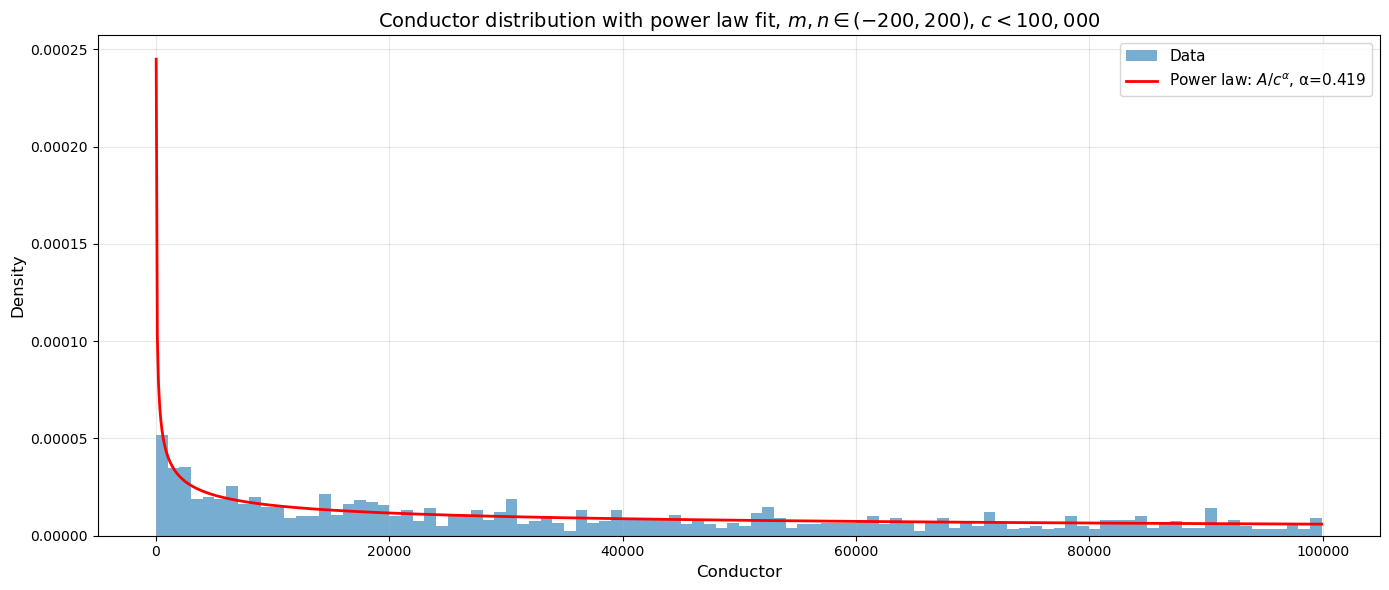

Saved plot: HV_curves/(-200,200)_conductor_distribution_loglog.png


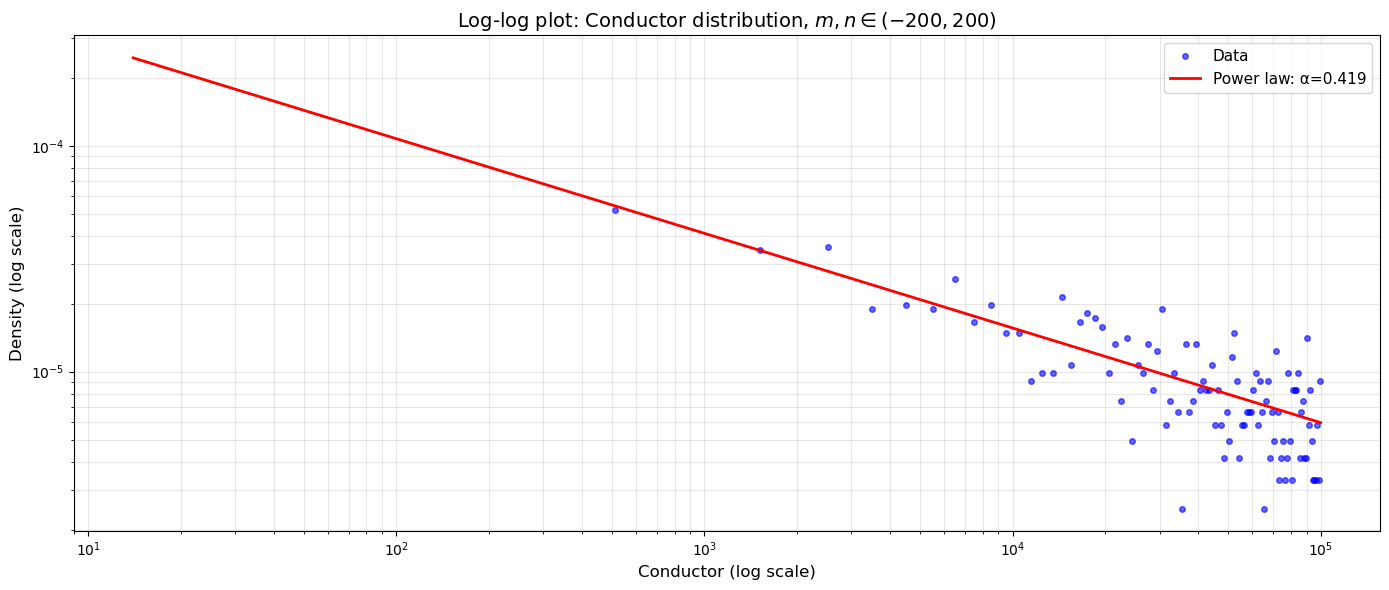

In [6]:
# Plot distribution of conductors with power law fit
from scipy.optimize import curve_fit

# Define power law function
def power_law(x, A, alpha):
    """Power law: A / x^alpha"""
    return A / (x**alpha)

plt.figure(figsize=(14, 6))

# Create histogram
counts, bins, patches = plt.hist(cs, bins=100, density=True, alpha=0.6, label='Data')

# Fit power law 1/x^alpha
# Use bin centers for fitting
bin_centers = (bins[:-1] + bins[1:]) / 2
# Filter out zero counts for better fitting
mask = counts > 0
try:
    popt, pcov = curve_fit(power_law, bin_centers[mask], counts[mask], p0=[1e6, 1.5], maxfev=10000)
    A_fit, alpha_fit = popt
    x_fit = np.linspace(min(cs), max(cs), 1000)
    y_power = power_law(x_fit, A_fit, alpha_fit)
    plt.plot(x_fit, y_power, 'r-', linewidth=2, label=f'Power law: $A/c^{{\\alpha}}$, α={alpha_fit:.3f}')
    print(f"Power law fit: A={A_fit:.2e}, α={alpha_fit:.3f}")
    
    # Save fit parameters
    fit_params = {
        'A': A_fit,
        'alpha': alpha_fit,
        'c_min': min(cs),
        'c_max': max(cs)
    }
    save(fit_params, f'HV_curves/({nmin},{nmax})_powerlaw_fit_params.sobj')
    print(f"Saved fit parameters to HV_curves/({nmin},{nmax})_powerlaw_fit_params.sobj")
    
except Exception as e:
    print(f"Power law fit failed: {e}")

plt.xlabel("Conductor", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title(fr"Conductor distribution with power law fit, $m,n\in({nmin},{nmax})$, $c<100,000$", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_conductor_distribution_fit.png', dpi=150)
print(f"Saved plot: HV_curves/({nmin},{nmax})_conductor_distribution_fit.png")
plt.show()
plt.close()

# Also create a log-log plot to visualize power law behavior
plt.figure(figsize=(14, 6))
counts_nonzero = counts[counts > 0]
bin_centers_nonzero = bin_centers[counts > 0]

plt.loglog(bin_centers_nonzero, counts_nonzero, 'bo', alpha=0.6, label='Data', markersize=4)

# Plot fitted power law on log-log scale
try:
    x_fit_positive = x_fit[x_fit > 0]
    y_power_fit = power_law(x_fit_positive, A_fit, alpha_fit)
    plt.loglog(x_fit_positive, y_power_fit, 'r-', linewidth=2, 
               label=f'Power law: α={alpha_fit:.3f}')
except:
    pass

plt.xlabel("Conductor (log scale)", fontsize=12)
plt.ylabel("Density (log scale)", fontsize=12)
plt.title(fr"Log-log plot: Conductor distribution, $m,n\in({nmin},{nmax})$", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig(f'HV_curves/({nmin},{nmax})_conductor_distribution_loglog.png', dpi=150)
print(f"Saved plot: HV_curves/({nmin},{nmax})_conductor_distribution_loglog.png")
plt.show()
plt.close()

In [19]:
def phi_to_isogeny_class(phi):
    """
    Given a parameter φ, compute the corresponding elliptic curve
    and return its isogeny class label.
    
    Parameters:
    -----------
    phi : numeric
        The parameter φ (should result in a curve over Q)
    
    Returns:
    --------
    str : The isogeny class label (e.g., '37a')
    
    Raises:
    -------
    ValueError : If the curve is not defined over Q or has no Cremona label
    """
    from sage.all import EllipticCurve, QQ
    
    # Compute Weierstrass coefficients from phi (equation 70)
    a_numerator = 9*phi**4 - 12*phi**3 + 30*phi**2 - 12*phi + 1
    a = -a_numerator / 3
    
    b_numerator = 27*phi**6 - 54*phi**5 - 135*phi**4 + 180*phi**3 - 99*phi**2 + 18*phi - 1
    b = -2 * b_numerator / 27
    
    # Create elliptic curve
    E = EllipticCurve([0, 0, 0, a, b])
    
    # Ensure we're working over Q
    try:
        E_Q = E.change_ring(QQ)
    except (TypeError, ValueError):
        raise ValueError(f"Curve from φ={phi} is not defined over Q")
    
    # Convert to minimal model
    E_min = E_Q.minimal_model()
    
    # Get the Cremona label
    try:
        label = E_min.label()
    except (RuntimeError, LookupError) as e:
        raise ValueError(f"Could not find Cremona label for curve from φ={phi}: {e}")
    
    # Extract isogeny class from label (e.g., '37a2' -> '37a')
    i = len(label) - 1
    while i >= 0 and label[i].isdigit():
        i -= 1
    isogeny_class = label[:i+1]
    
    return isogeny_class

Saved plot: HV_curves/attractor_phi_-1_7_comparison.png


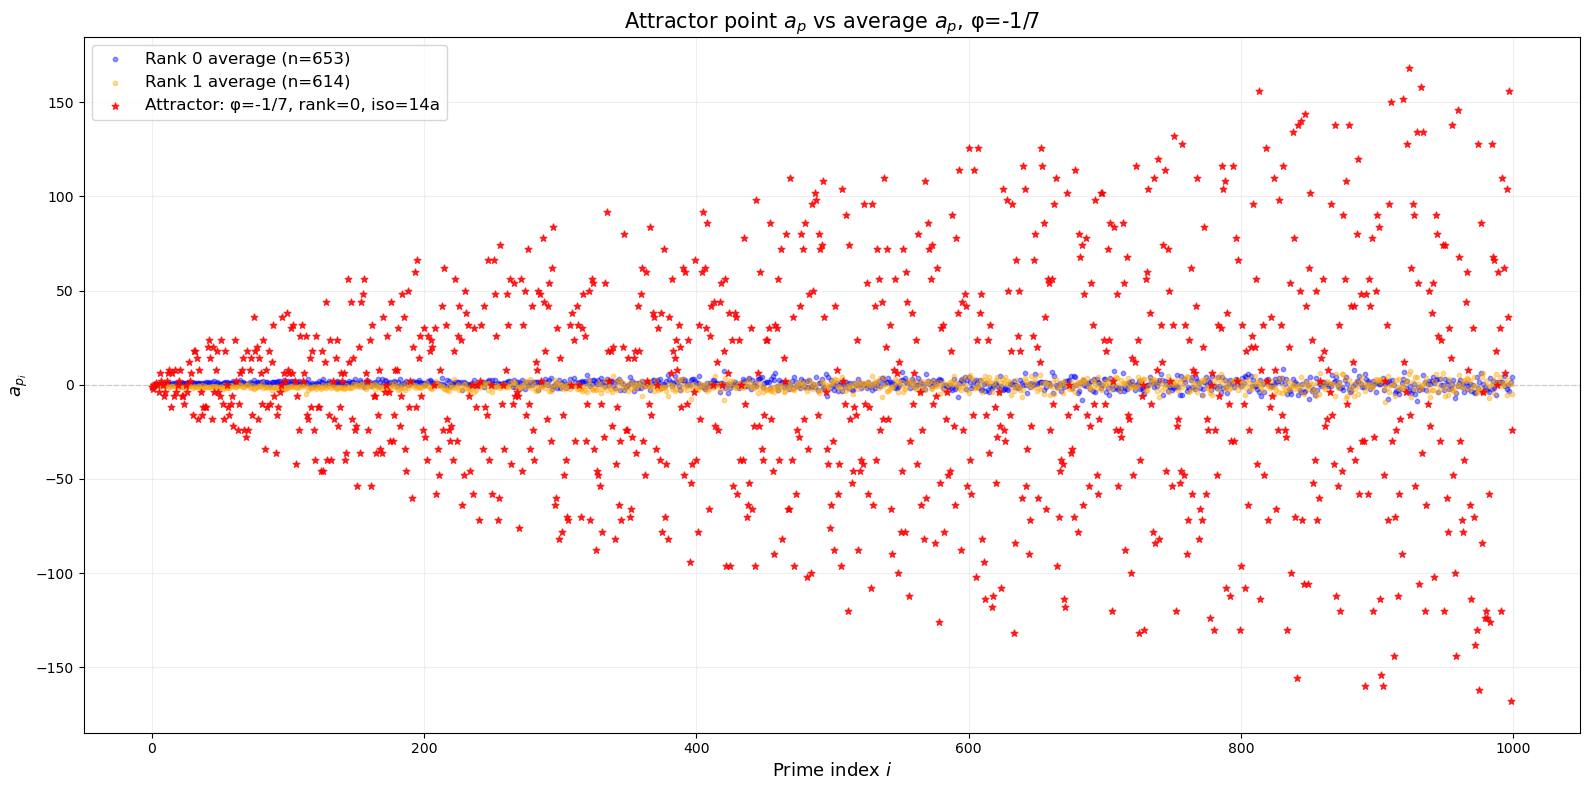

In [34]:
phi = QQ(-1/7)
iso = phi_to_isogeny_class(phi)
attractor_curve = curve_db[iso]
attractor_aps = attractor_curve['ap_list']
attractor_rank = attractor_curve['rank']

# Load average data
averages_data = load("HV_curves/(-500,500)_average_aps.sobj")
rk0_aps = averages_data['rank_0_average']
rk1_aps = averages_data['rank_1_average']

# Create the plot
plt.figure(figsize=(16, 8))

# Plot averages with smaller markers
plt.scatter(range(1000), rk0_aps, 
           label=f"Rank 0 average (n={averages_data['rank_0_count']})", 
           alpha=0.4, s=10, color='blue')
plt.scatter(range(1000), rk1_aps, 
           label=f"Rank 1 average (n={averages_data['rank_1_count']})", 
           alpha=0.4, s=10, color='orange')

# Plot attractor point with larger, more visible markers
plt.scatter(range(1000), attractor_aps, 
           label=f"Attractor: φ={phi}, rank={attractor_rank}, iso={iso}", 
           alpha=0.8, s=25, color='red', marker='*', zorder=5)

# Styling
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
plt.legend(fontsize=12, loc='best')
plt.xlabel(r"Prime index $i$", fontsize=13)
plt.ylabel(r"$a_{p_i}$", fontsize=13)
plt.title(fr"Attractor point $a_p$ vs average $a_p$, φ={phi}", fontsize=15)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig(f'HV_curves/attractor_phi_{str(phi).replace("/", "_")}_comparison.png', dpi=150)
print(f"Saved plot: HV_curves/attractor_phi_{str(phi).replace('/', '_')}_comparison.png")
plt.show()